In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import pamRaMom

%matplotlib inline

Settings

In [2]:
kwargs = {
    'max_v': 5.9773,
    'min_v': -5.9773,
    'no_ave': 9,
    'noise_distance_factor': 0,
    'noise_max': None,
    'noise_mean': None,
    'npeaks': 2,
    'peak_min_bins': 2,
    'peak_min_snr': 1.2,
    'smooth_spectrum': True,
    'use_wider_peak': False,
    'verbose': 1,
}

Sample Spectrum

In [3]:
spectraCalib = np.array([  
         3.34392762e-05,   2.72982929e-05,   4.34557489e-05,   5.05754554e-05,   3.41392713e-05,   3.14242365e-05,   3.32361401e-05,   4.40959120e-05,   2.35987617e-05,   2.24212798e-05,   3.15009209e-05,   3.51953822e-05,   1.82146986e-05,   1.50153227e-05,   2.14719633e-05,   2.30586205e-05,   2.88547096e-05,   3.93950819e-05,   3.71567436e-05,   1.78629782e-05,   1.62729266e-05,   3.25546630e-05,   6.11651404e-05,   4.19467937e-05,   1.60954213e-05,   3.08738294e-05,   2.25308423e-05,   1.69097536e-05,   3.75207669e-05,   2.77173183e-05,   1.51163029e-05,   3.04998656e-05,   2.88898951e-05,   3.21407494e-05,   3.22781325e-05,   3.91319141e-05,   3.43270044e-05,   2.81085000e-05,   2.26823655e-05,   2.81942674e-05,   2.15506080e-05,   1.87781769e-05,   1.25220461e-05,   2.93512305e-05,   4.26685983e-05,   3.03515514e-05,   2.95846535e-05,   3.45789221e-05,   4.26946055e-05,   3.59321384e-05,   2.40341118e-05,   2.58888517e-05,   2.94407898e-05,   2.97292202e-05,   3.61297305e-05,   4.12874844e-05,   3.24556312e-05,   4.64399533e-05,   4.18701854e-05,   2.11731412e-05,   2.15243612e-05,   4.06385379e-05,   4.51013554e-05,   2.53271400e-05,   3.42434404e-05,   4.16665799e-05,   1.28153712e-05,   2.56376802e-05,   1.85394234e-05,   2.44030324e-05,   2.75993470e-05,   3.66173200e-05,   2.98381086e-05,   3.95875876e-05,   2.20285628e-05,   2.17087628e-05,   2.64952902e-05,   2.51886268e-05,   3.50242348e-05,   3.41392713e-05,   2.38299579e-05,   2.36131455e-05,   4.31654549e-05,   5.66448919e-05,   5.22991203e-05,   3.19649729e-05,   2.97111108e-05,   3.25546630e-05,   3.56921038e-05,   3.39525649e-05,   2.52500945e-05,   1.41967463e-05,   2.76330018e-05,   2.87669331e-05,   1.20284536e-05,   2.89603949e-05,   2.24349459e-05,   2.32136931e-05,   4.48000684e-05,   3.88941964e-05,   2.15768869e-05,   3.46844327e-05,   4.63551391e-05,   3.72474170e-05,   2.56533068e-05,   1.92766900e-05,   5.48782251e-05,   7.26764856e-05,   3.93710846e-05,   1.64023411e-05,   2.41957447e-05,   4.71815411e-05,   5.38513463e-05,   2.99291535e-05,   2.50661401e-05,   2.52962936e-05,   3.02223683e-05,   3.27536339e-05,   3.10625273e-05,   3.71793912e-05,   2.44179064e-05,   2.49138689e-05,   5.76898773e-05,   5.31990638e-05,   2.16031979e-05,   2.09549488e-05,   4.01462976e-05,   2.98744932e-05,   4.48000684e-05,   4.95988585e-05,   3.67066770e-05,   2.25445752e-05,   2.10958739e-05,   2.03013963e-05,   3.21407494e-05,   3.60198234e-05,   3.52812693e-05,   3.18871589e-05,   2.13545339e-05,   2.85921804e-05,   2.60629580e-05,   2.78697368e-05,   3.52168343e-05,   3.99510749e-05,   3.33985499e-05,   3.50029000e-05,   3.16934515e-05,   3.75665198e-05,   3.50455826e-05,   3.92035123e-05,   3.04998656e-05,   3.79114500e-05,   3.63948780e-05,   1.96682270e-05,   1.35873747e-05,   1.51624272e-05,   3.08738294e-05,   4.03424741e-05,   4.59333856e-05,   2.86096078e-05,   2.72650458e-05,   2.36707685e-05,   3.68411216e-05,   4.72390745e-05,   2.72982929e-05,   3.16162984e-05,   2.01780699e-05,   2.57786628e-05,   4.23835626e-05,   1.04371856e-04,   1.50714332e-04,   3.30568170e-04,   1.07412066e-03,   3.47107058e-03,   6.43476048e-03,   9.50953817e-03,   3.65140279e-02,   8.15155491e-02,   6.86459858e-02,   6.06960090e-02,   5.80199842e-02,   2.40981068e-02,   7.02060113e-03,   3.28784613e-03,   1.93973755e-03,   5.02719377e-04,   2.24092788e-04,   8.63542784e-05,   9.24532710e-05,   6.93453754e-05,   3.18871589e-05,   2.24623032e-05,   1.01982936e-04,   1.52283637e-04,   2.05393155e-04,   6.91395375e-04,   1.27549389e-03,   1.56147535e-03,   3.84990786e-03,   1.02434001e-02,   1.11828031e-02,   1.30070441e-02,   4.79163991e-02,   2.03569573e-01,   3.58116007e-01,   3.67175346e-01,   9.69821410e-01,   1.05233017e+00,   1.11097422e+00,   1.68542744e+00,   1.73862583e+00,   1.04657502e+00,   3.11475395e-01,   2.04066343e-01,   1.99395562e-01,   1.95903076e-01,   8.78061971e-02,   1.25028740e-01,   8.33742083e-02,   8.32726653e-02,   1.38421279e-01,   1.38336960e-01,   9.07434154e-02,   5.43578572e-02,   3.09371796e-02,   3.06930852e-02,   2.92684350e-02,   2.98629186e-02,   2.89315402e-02,   4.11459394e-02,   4.80919012e-02,   5.43909892e-02,   4.87706347e-02,   4.27301055e-02,   4.01796787e-02,   2.31905641e-02,   2.00233058e-02,   2.72544822e-02,   1.71417613e-02,   1.28494943e-02,   6.50572504e-03,   2.32171260e-03,   1.44696003e-03,   6.58500590e-04,   3.00226959e-04,   3.58691667e-04,   1.78208110e-04,   1.46637909e-04,   9.22282071e-05,   5.26508395e-05,   6.11278820e-05,   6.33268399e-05,   4.25387998e-05,   3.99024178e-05,   3.92991803e-05,   3.22978066e-05,   5.23309975e-05,   4.92975565e-05,   2.55285604e-05,   3.86343746e-05,   4.36414971e-05,   4.75567641e-05,   5.57545615e-05,   4.59893969e-05,   4.90578333e-05,   3.66396388e-05,   4.95686456e-05,   7.23230759e-05,   3.89179031e-05,   1.62432070e-05,   3.18289227e-05,   5.35242114e-05,   2.43139783e-05,   8.58756604e-06,   2.89251235e-05,   4.41227892e-05,   3.22388204e-05,   3.03515514e-05,   4.12120802e-05,   5.62322171e-05,   3.42851969e-05,   2.81942674e-05,   2.56376802e-05,   2.85921804e-05,   2.95846535e-05,   3.45578585e-05,   3.83529118e-05,   3.24952077e-05,   3.98295432e-05,   3.93471019e-05,   2.79377472e-05,   2.53580240e-05,   3.14625553e-05,   4.03670635e-05,   5.13205016e-05,   3.38286616e-05,   4.78765903e-05,   2.55596900e-05,   2.44179064e-05,   4.03916679e-05,   2.69347939e-05,   1.36454528e-05,   2.05127836e-05,   2.51732833e-05,   3.67962521e-05,   2.52808845e-05,   2.11473540e-05,   3.21799420e-05,   3.74294281e-05,   3.82595473e-05,   2.93512305e-05,   2.82802965e-05,   2.94946565e-05,   2.35843866e-05,   3.65727231e-05,   3.63062800e-05,   3.53673659e-05,   3.71114897e-05,   3.63062800e-05,   3.21995562e-05,   2.42252491e-05,   2.86969042e-05,   5.21718058e-05,   4.22288920e-05,   2.95666322e-05,   2.42695731e-05,   3.09869102e-05,   5.18548738e-05,   2.87844670e-05,   1.43533125e-05,   3.69985960e-05,   4.88490320e-05,   4.46093891e-05,   3.94190938e-05,   4.83751029e-05,   4.53217451e-05,   2.90310668e-05,   2.70169800e-05,   2.13155337e-05,   2.88195669e-05,   2.94228561e-05,   2.23530739e-05,   3.13859644e-05,   2.58258290e-05,   2.52808845e-05,   2.74818779e-05,   1.99701318e-05,   1.12967374e-05,   1.89159855e-05,   1.81371726e-05,   3.62178977e-05,   3.37874611e-05,   2.60788437e-05,   3.47902652e-05,   2.65923337e-05,   4.13882380e-05,   4.22803861e-05,   2.50967058e-05,   2.09294274e-05,   2.53117121e-05,   3.92035123e-05,   3.02592216e-05,   2.31289792e-05,   3.97083811e-05,   2.78697368e-05,   3.72928366e-05,   2.82802965e-05,   3.21995562e-05,   4.37746603e-05,   3.42017347e-05,   2.29744725e-05,   3.45578585e-05,   3.21603397e-05,   4.74988439e-05,   4.63269021e-05,   3.07424234e-05,   2.66247605e-05,   2.54044206e-05,   1.51439606e-05,   1.80489756e-05,   2.77849567e-05,   2.24076220e-05,   1.90896692e-05,   2.92797792e-05,   2.61106444e-05,   2.07011289e-05,   2.72484375e-05,   3.59759542e-05,   3.76123286e-05,   2.84184894e-05,   3.18483229e-05,   2.97473406e-05,   3.44317463e-05,   2.54819371e-05,   2.91196492e-05,   4.75277952e-05,   2.68856023e-05,   3.85638159e-05,   3.31552316e-05,   3.20039511e-05,   3.24556312e-05,   2.01534946e-05,   1.77977907e-05,   2.28349077e-05,   2.64791507e-05,   3.02223683e-05,   3.62178977e-05,   3.33985499e-05,   1.90431982e-05,   1.23252276e-05,   3.35617534e-05,   4.01707674e-05,   4.21517685e-05,   6.90923128e-05,   5.82195772e-05,   4.48273748e-05,   4.64682592e-05,   4.68092786e-05,   3.75894172e-05,   2.42400148e-05,   1.02286554e-05,   3.51097042e-05,   3.95875876e-05,   2.19749375e-05,   2.27377171e-05,   3.00387742e-05,   2.83838780e-05,   2.83838780e-05,   1.25526035e-05,   2.65923337e-05,   3.38492807e-05,   3.28735998e-05,   3.39732595e-05,   2.67711711e-05,   1.92766900e-05,   1.76466102e-05,   1.99823040e-05,   3.64170612e-05,   5.02682208e-05,   2.87844670e-05,   2.76161693e-05,   2.31571827e-05,   3.42017347e-05,   2.73815881e-05,   2.92619436e-05,   3.10436058e-05,   3.92513171e-05,   3.49815781e-05,   2.19883316e-05,   2.78697368e-05,   2.88195669e-05,   2.21631993e-05,   1.52923255e-05,   2.95846535e-05,   2.24623032e-05,   3.38492807e-05,   4.91176546e-05,   5.15712814e-05,   3.70211473e-05,   1.98246435e-05,   4.25128875e-05,   4.48820374e-05,   3.77961228e-05,   3.06115766e-05,   3.40146867e-05,   2.46270974e-05,   1.57270206e-05,   3.46421899e-05,   3.56486337e-05,   2.43436268e-05,   3.80039651e-05,   3.04812867e-05,   1.49605272e-05,   2.53580240e-05,   3.15777924e-05,   2.82630697e-05,   2.54664149e-05,   2.08784778e-05,   1.71588576e-05,   1.35790980e-05,   1.77652862e-05,   2.40927621e-05,   2.97111108e-05,   2.19615516e-05,   2.89603949e-05,   4.50464256e-05,   2.82802965e-05,   2.43139783e-05,   3.81199265e-05,   1.79940703e-05,   2.70334472e-05,   1.62729266e-05,   1.77220392e-05,   1.94063286e-05,   1.06613770e-05,   1.43270987e-05,   2.67711711e-05,   2.37864367e-05,   1.91829517e-05,   2.13936055e-05,   1.82702770e-05,   1.86186687e-05,   2.23530739e-05,   3.95875876e-05,   3.53242914e-05,   3.49602693e-05,   3.80503072e-05,   3.10625273e-05,   3.11953017e-05,   5.34264590e-05,   4.83751029e-05,   2.87844670e-05])

Get the moments. We run it for alsmot the same spectra twice. 

In [27]:
(
    spectrum_out,
    moments,
    slope,
    edge,
    quality,
    noise
) =  pamRaMom.calc_radarMoments([spectraCalib,spectraCalib*2],**kwargs)



Results

/Users/mmaahn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10
/Users/mmaahn/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10


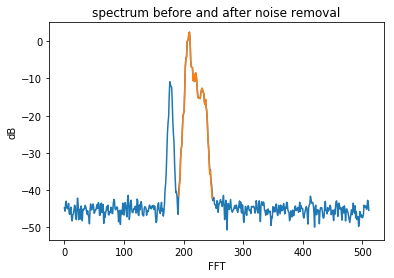

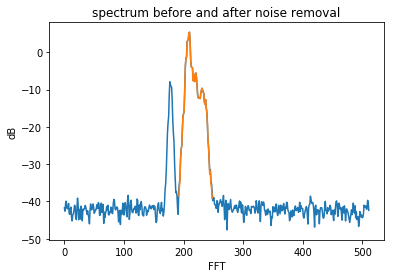

In [28]:
plt.figure(1)
plt.title('spectrum before and after noise removal')
plt.plot(np.log10(spectraCalib)*10)
plt.plot(np.log10(spectrum_out[0])*10)
plt.xlabel('FFT')
plt.ylabel('dB')

plt.figure(2)
plt.title('spectrum before and after noise removal')
plt.plot(np.log10(spectraCalib*2)*10)
plt.plot(np.log10(spectrum_out[1])*10)
plt.xlabel('FFT')
plt.ylabel('dB')

Refletivity, Mean Doppler, Spectrum Width, Skewness, Kurtosis of first peak

In [24]:
print(moments[:,:,0])

[[ 10.87062966  -1.0617202    0.14223128   2.22837761   8.82062676]
 [ 21.74125932  -1.0617202    0.14223128   2.22837761   8.82062676]]


Reflectivity in dBz

In [25]:
print(np.log10(moments[:,0,0])*10)

[ 10.36254701  13.37284696]
